<a href="https://colab.research.google.com/github/Heba-Ajami/Applied-Data-Science-Capstone/blob/main/Cross_table_Correlation_Clustering_Water_Lifya_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WATER SUSTAINABILITY METRICS - ENHANCED CLUSTERING ANALYSIS
Multi-File Version with Master Metadata Filtering

📋 STEP 1: Upload Master Metadata File
--------------------------------------------------------------------------------
Expected columns:
  • table_name (which table/file the metric comes from)
  • metrics (name of the metric)
  • weight (expert-assigned weight)
  • missing_percent (% missing data)
  • Theme (sustainability theme)
  • Action (keep/drop action)

Note: This should only include metrics with < 70% missing data
--------------------------------------------------------------------------------


Saving master_metadata_water.csv to master_metadata_water.csv

✓ Uploaded: master_metadata_water.csv
✓ Loaded metadata: 132 metrics

Columns in metadata: ['table_name', 'metrics', 'weight', 'missing_percent', 'Theme', 'Action']

First few rows:
          table_name                    metrics  weight  missing_percent  \
0  agriculture_water   rainfall_agri_dependency     0.8             0.24   
1  agriculture_water  agri_water_security_index     0.9             0.15   
2  agriculture_water              agri_withdraw     0.8             0.14   

                                      Theme Action  
0          Water Withdrawal & Use Intensity   Keep  
1  Water Governance, Infrastructure & Reuse   Keep  
2          Water Withdrawal & Use Intensity   Keep  

⚙️ STEP 2: Verifying Column Names
--------------------------------------------------------------------------------
✓ table_name: 'table_name'
✓ metrics: 'metrics'
✓ weight: 'weight'
✓ missing_percent: 'missing_percent'
✓ Theme: 'Theme'
✓

Saving Lifya_water - agriculture_water (2).csv to Lifya_water - agriculture_water (2).csv
Saving Lifya_water - area_equipped_irrigation_ha.csv to Lifya_water - area_equipped_irrigation_ha.csv
Saving Lifya_water - country_index (1).csv to Lifya_water - country_index (1).csv
Saving Lifya_water - country_total (3).csv to Lifya_water - country_total (3).csv
Saving Lifya_water - ground_water (1).csv to Lifya_water - ground_water (1).csv
Saving Lifya_water - irrigation_farmland (1).csv to Lifya_water - irrigation_farmland (1).csv
Saving Lifya_water - per_area_equipped_irrigation.csv to Lifya_water - per_area_equipped_irrigation.csv
Saving Lifya_water - per_cultivated_area.csv to Lifya_water - per_cultivated_area.csv
Saving Lifya_water - population_health (2).csv to Lifya_water - population_health (2).csv
Saving Lifya_water - rainfall (1).csv to Lifya_water - rainfall (1).csv
Saving Lifya_water - sdg_data.csv to Lifya_water - sdg_data.csv
Saving Lifya_water - surface_water (1).csv to Lifya_wa

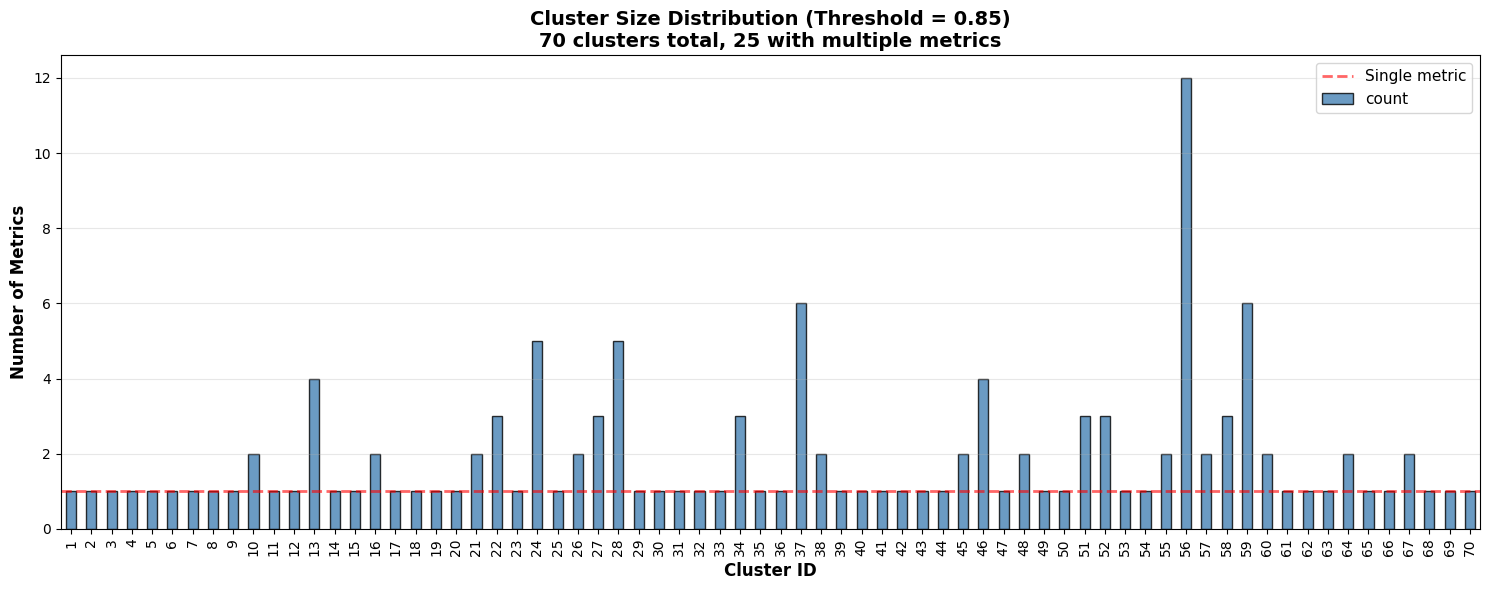

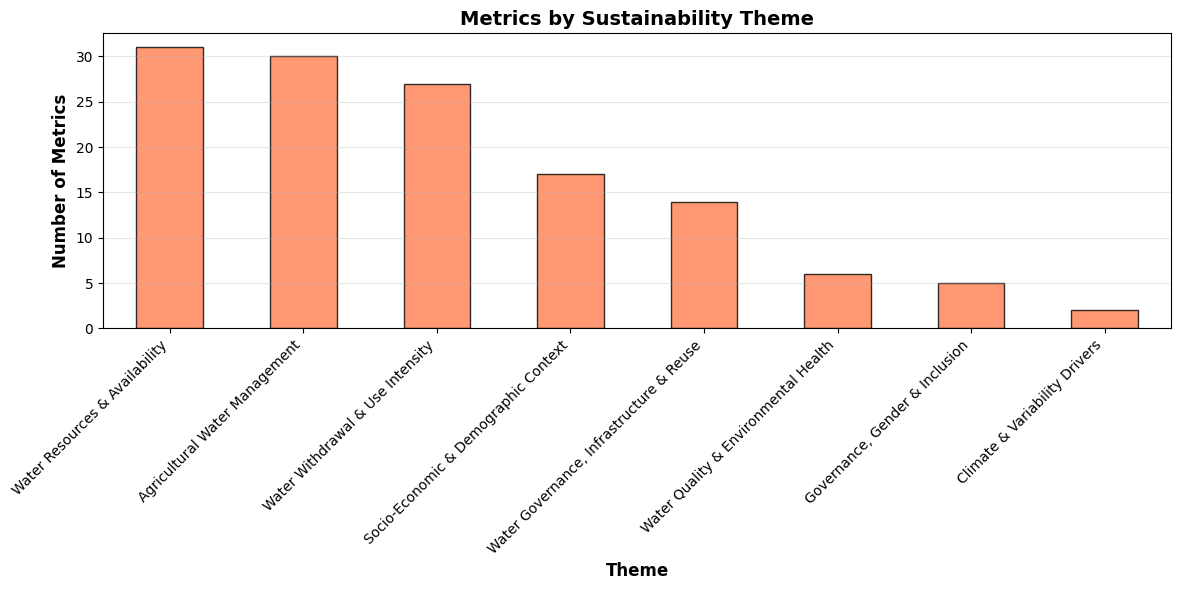


Generating correlation heatmaps for largest clusters...


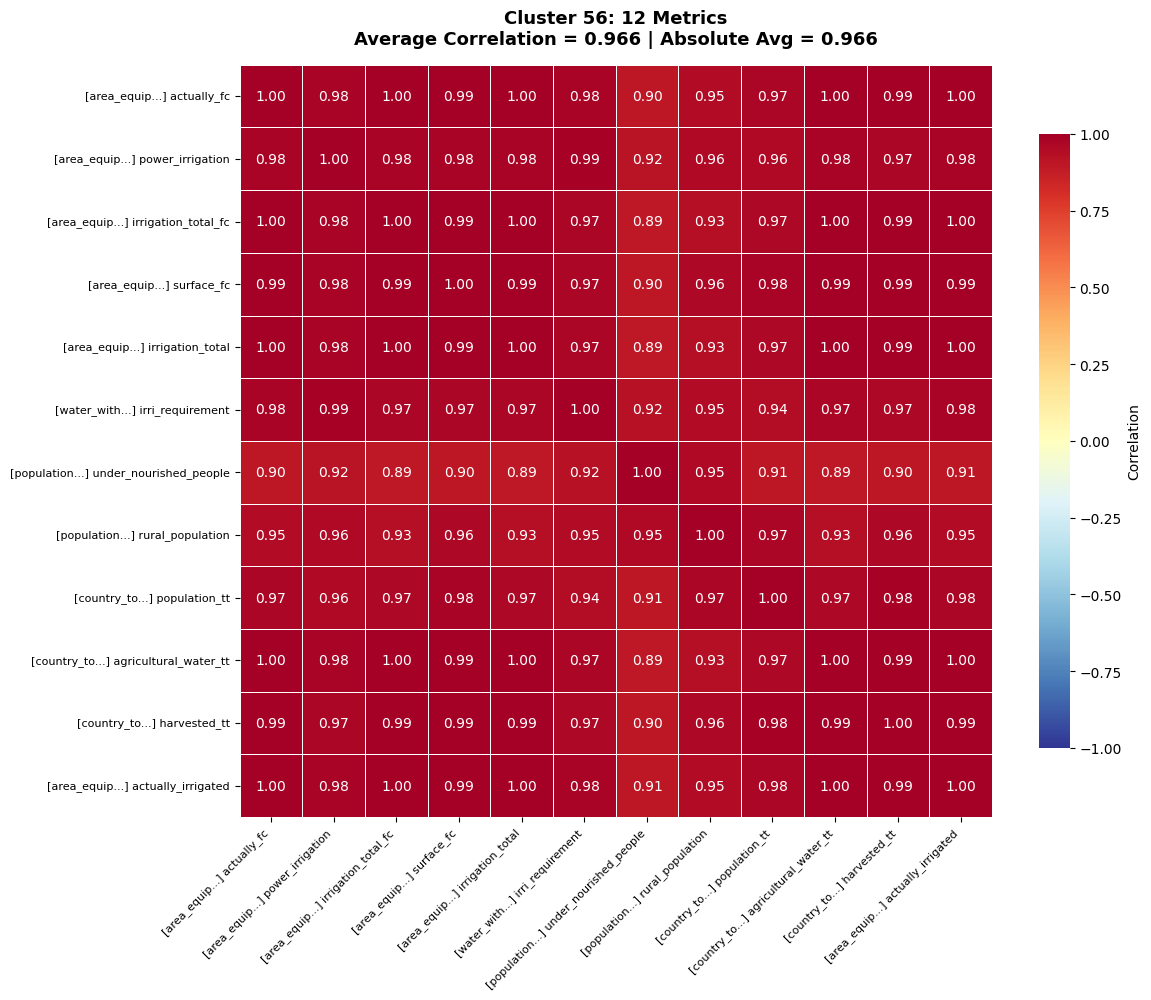

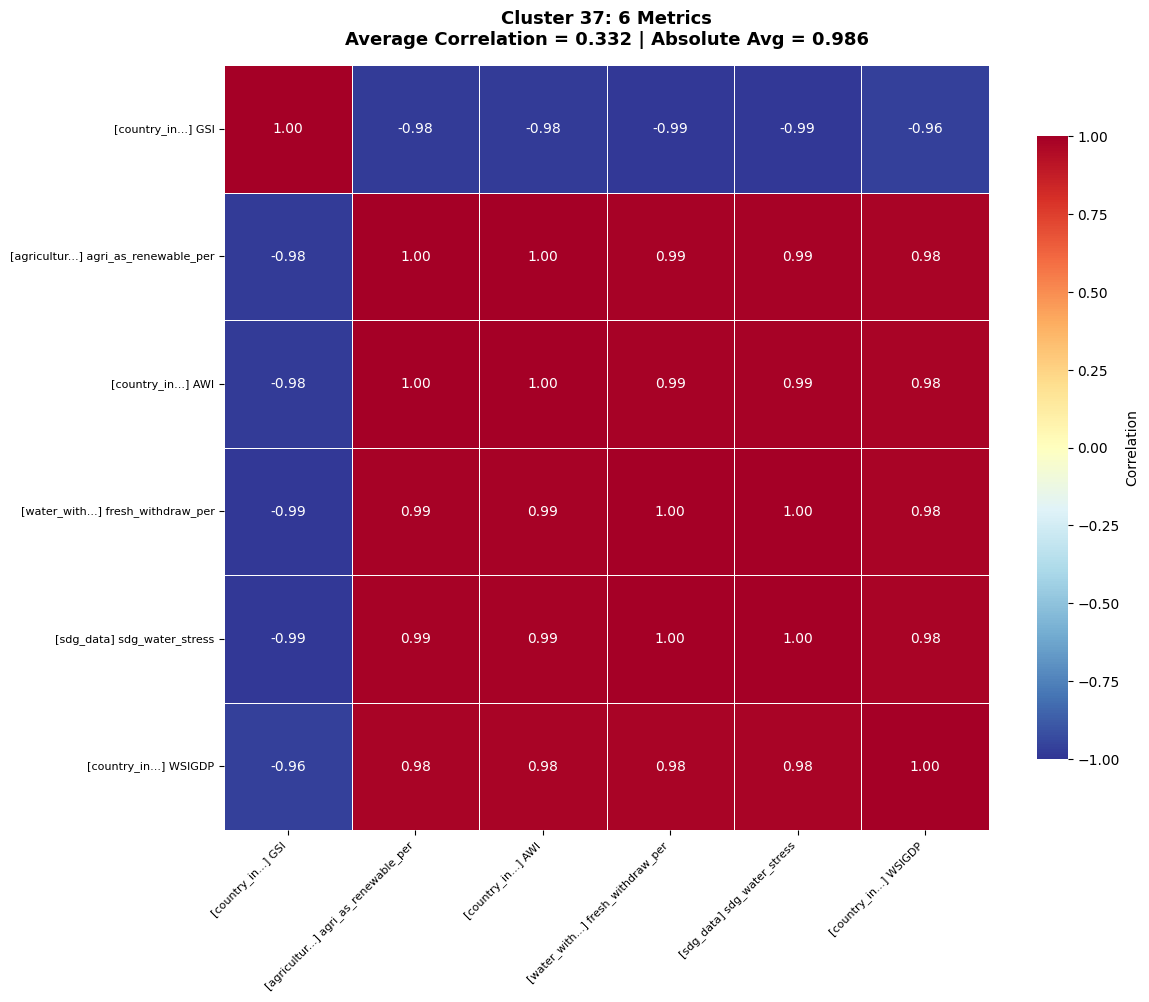

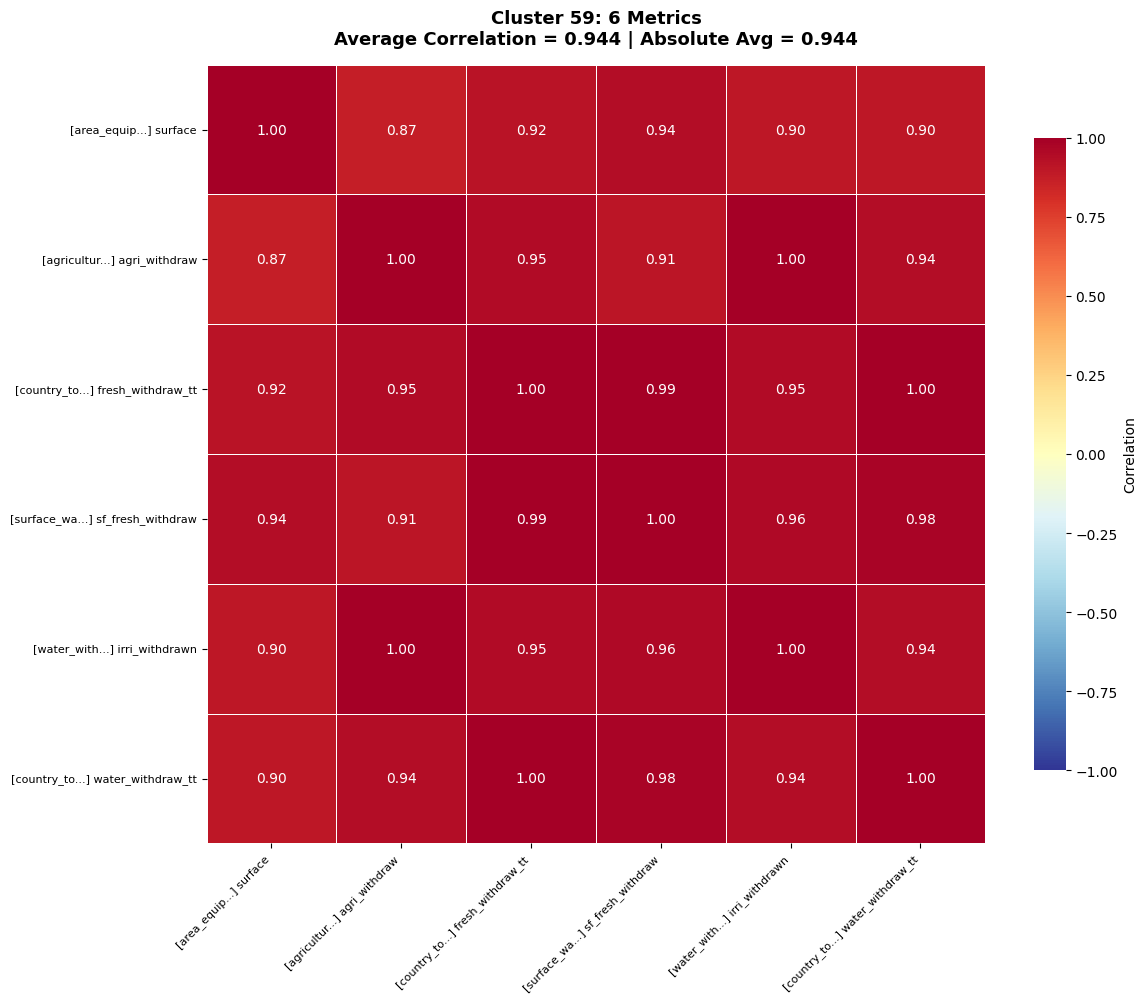


💾 STEP 17: Saving Results
--------------------------------------------------------------------------------
✓ Saved: metadata_with_clusters.csv
✓ Saved: cluster_summary.csv
✓ Saved: cluster_assignments.csv
✓ Saved: correlation_matrix.csv
✓ Saved: metrics_found.csv
✓ Saved: table_summary.csv

📥 Downloading files...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✓ All files downloaded!

✅ ANALYSIS COMPLETE!

📊 SUMMARY:
  Master metadata: 132 metrics (< 70% missing)
  Tables loaded: 15
  Metrics found in data: 132/132
  Metrics NOT found: 0
  Clusters identified: 70
  Single-metric clusters: 45
  Multi-metric clusters (NEED REVIEW): 25
  Cross-table redundancies: 18

🔴 HIGH PRIORITY CLUSTERS (Review first):
   • Cluster 56: 12 metrics, avg |r| = 0.966
     Tables: area_equipped_irrigation_ha, country_total, population_health, water_withdraw
   • Cluster 37: 6 metrics, avg |r| = 0.986
     Tables: agriculture_water, country_index, sdg_data, water_withdraw
     ⚠️  Contains negative correlations
   • Cluster 59: 6 metrics, avg |r| = 0.944
     Tables: agriculture_water, area_equipped_irrigation_ha, country_total, surface_water, water_withdraw
   • Cluster 24: 5 metrics, avg |r| = 0.975
     Tables: country_index, surface_water
   • Cluster 28: 5 metrics, avg |r| = 0.973
     Tables: country_total, rainfall, surface_water

📋 DECISION FRAMEWORK:



In [1]:
# Water Sustainability Metrics - Enhanced Correlation Clustering
# ===================================================================
#
# MASTER METADATA STRUCTURE:
# - table_name: which table/file the metric comes from
# - metrics: name of the metric
# - weight: expert-assigned weight
# - missing_percent: % of missing data
# - Theme: sustainability theme
# - Action: keep/drop
#
# DATA TABLE STRUCTURE (each Excel file):
# - country: country name
# - year: year of data
# - cc: country code
# - [metric columns]: actual metric values
#
# FILTERING: Only metrics in master metadata (< 70% missing) are analyzed
# ===================================================================

import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

print("="*80)
print("WATER SUSTAINABILITY METRICS - ENHANCED CLUSTERING ANALYSIS")
print("Multi-File Version with Master Metadata Filtering")
print("="*80)

# ============================================================================
# STEP 1: Upload Master Metadata File
# ============================================================================

print("\n📋 STEP 1: Upload Master Metadata File")
print("-"*80)
print("Expected columns:")
print("  • table_name (which table/file the metric comes from)")
print("  • metrics (name of the metric)")
print("  • weight (expert-assigned weight)")
print("  • missing_percent (% missing data)")
print("  • Theme (sustainability theme)")
print("  • Action (keep/drop action)")
print("\nNote: This should only include metrics with < 70% missing data")
print("-"*80)

metadata_upload = files.upload()
metadata_filename = list(metadata_upload.keys())[0]

print(f"\n✓ Uploaded: {metadata_filename}")

# Load metadata
if metadata_filename.endswith('.csv'):
    metadata = pd.read_csv(io.BytesIO(metadata_upload[metadata_filename]))
else:
    metadata = pd.read_excel(io.BytesIO(metadata_upload[metadata_filename]))

# Convert 'weight' and 'missing_percent' columns to numeric types
metadata['weight'] = pd.to_numeric(metadata['weight'], errors='coerce')
metadata['missing_percent'] = metadata['missing_percent'].astype(str).str.replace('%', '', regex=False).astype(float)

print(f"✓ Loaded metadata: {len(metadata)} metrics")
print(f"\nColumns in metadata: {list(metadata.columns)}")
print(f"\nFirst few rows:")
print(metadata.head(3))

# ============================================================================
# STEP 2: Verify Metadata Column Names
# ============================================================================

print("\n⚙️ STEP 2: Verifying Column Names")
print("-"*80)

# Expected columns (case-insensitive matching)
expected_cols = {
    'table_name': ['table_name', 'table', 'Table_Name', 'source_table', 'file'],
    'metrics': ['metrics', 'metric', 'Metric', 'Metrics', 'metric_name', 'Metric_Name'],
    'weight': ['weight', 'Weight', 'weights'],
    'missing_percent': ['missing_percent', 'Missing_Percent', 'missing_data', 'Missing_Data', 'missing%'],
    'Theme': ['Theme', 'theme', 'category', 'Category'],
    'Action': ['Action', 'action', 'effect', 'Effect']
}

# Map actual column names
column_mapping = {}
for expected, variants in expected_cols.items():
    found = False
    for col in metadata.columns:
        if col in variants:
            column_mapping[expected] = col
            found = True
            break
    if not found:
        # Try case-insensitive
        for col in metadata.columns:
            if col.lower() in [v.lower() for v in variants]:
                column_mapping[expected] = col
                found = True
                break

    if found:
        print(f"✓ {expected}: '{column_mapping[expected]}'")
    else:
        print(f"⚠️  {expected}: NOT FOUND")
        print(f"   Available: {list(metadata.columns)}")
        column_mapping[expected] = input(f"   Enter column name for {expected}: ").strip()

# Rename columns for consistency
metadata = metadata.rename(columns={
    column_mapping['table_name']: 'table_name',
    column_mapping['metrics']: 'metrics',
    column_mapping['weight']: 'weight',
    column_mapping['missing_percent']: 'missing_percent',
    column_mapping['Theme']: 'Theme',
    column_mapping['Action']: 'Action'
})

print(f"\n✓ Standardized column names")

# Get list of metrics to analyze (these are pre-filtered < 70% missing)
metrics_to_analyze = metadata['metrics'].tolist()
tables_needed = metadata['table_name'].unique().tolist()

print(f"\n✓ Metrics to analyze: {len(metrics_to_analyze)}")
print(f"✓ Tables referenced: {len(tables_needed)}")
print(f"\nTables needed:")
for table in sorted(tables_needed):
    count = len(metadata[metadata['table_name'] == table])
    print(f"  • {table}: {count} metrics")

# ============================================================================
# STEP 3: Upload All Table Files
# ============================================================================

print("\n📊 STEP 3: Upload ALL Table Files")
print("-"*80)
print("Upload ALL your data table files at once")
print("(Select multiple files in the upload dialog)")
print("\nExpected format for each file:")
print("  • Columns: country, year, cc, [metric1], [metric2], ...")
print("  • Rows: data for each country-year combination")
print("\nAccepted formats: .csv, .xlsx, .xls")
print("-"*80)
print("\n⏳ Waiting for files...")

tables_upload = files.upload()
table_filenames = list(tables_upload.keys())

print(f"\n✓ Uploaded {len(table_filenames)} files:")
for i, fname in enumerate(table_filenames, 1):
    print(f"  {i}. {fname}")

# ============================================================================
# STEP 4: Configure Standard Columns
# ============================================================================

print("\n⚙️ STEP 4: Configure Standard Column Names")
print("-"*80)

# Standard columns that are in every table
COUNTRY_COL = 'country'
YEAR_COL = 'year'
CC_COL = 'cc'

print(f"Standard columns expected in each table:")
print(f"  • Country column: '{COUNTRY_COL}'")
print(f"  • Year column: '{YEAR_COL}'")
print(f"  • Country code column: '{CC_COL}'")

confirm = input("\nAre these correct? (yes/no): ").strip().lower()
if confirm == 'no' or confirm == 'n':
    COUNTRY_COL = input("Enter country column name: ").strip()
    YEAR_COL = input("Enter year column name: ").strip()
    CC_COL = input("Enter country code column name: ").strip()

print(f"\n✓ Using: country='{COUNTRY_COL}', year='{YEAR_COL}', cc='{CC_COL}'")

# ============================================================================
# STEP 5: Set Correlation Threshold
# ============================================================================

print("\n⚙️ STEP 5: Set Correlation Threshold")
print("-"*80)

CORRELATION_THRESHOLD = 0.85
print(f"Default threshold: {CORRELATION_THRESHOLD}")
print("(Metrics with |correlation| > 0.85 will be grouped together)")

change = input("Use default 0.85? (yes/no): ").strip().lower()
if change == 'no' or change == 'n':
    CORRELATION_THRESHOLD = float(input("Enter threshold (e.g., 0.80, 0.85, 0.90): ").strip())

print(f"\n✓ Using threshold: {CORRELATION_THRESHOLD}")

# ============================================================================
# STEP 6: Load and Process All Table Files
# ============================================================================

print("\n📂 STEP 6: Loading and Processing Table Files")
print("-"*80)

all_tables = {}
table_info = []
file_to_table_mapping = {}  # Map filename to table_name

for filename in table_filenames:
    print(f"\nProcessing: {filename}")

    try:
        # Load file
        if filename.endswith('.csv'):
            df = pd.read_csv(io.BytesIO(tables_upload[filename]))
        else:
            # For Excel files, check if multiple sheets
            excel_file = pd.ExcelFile(io.BytesIO(tables_upload[filename]))
            if len(excel_file.sheet_names) > 1:
                print(f"  ⚠️  Multiple sheets found: {excel_file.sheet_names}")
                print(f"  Using first sheet: '{excel_file.sheet_names[0]}'")
            df = pd.read_excel(io.BytesIO(tables_upload[filename]), sheet_name=0)

        # Extract table name from filename (remove extension)
        table_name = filename.rsplit('.', 1)[0]

        # Clean up table name (remove common suffixes/prefixes)
        table_name = table_name.replace('_data', '').replace('Data', '').strip()

        print(f"  Table name: {table_name}")

        # Check for standard columns (flexible matching)
        cols_lower = [c.lower() for c in df.columns]

        # Find country column
        country_col = None
        for col in df.columns:
            if col.lower() == COUNTRY_COL.lower():
                country_col = col
                break
        if country_col is None:
            for col in df.columns:
                if 'country' in col.lower() or 'nation' in col.lower():
                    country_col = col
                    print(f"  → Using '{col}' as country column")
                    break

        # Find year column
        year_col = None
        for col in df.columns:
            if col.lower() == YEAR_COL.lower():
                year_col = col
                break
        if year_col is None:
            for col in df.columns:
                if 'year' in col.lower() or 'date' in col.lower():
                    year_col = col
                    print(f"  → Using '{col}' as year column")
                    break

        # Find cc column
        cc_col = None
        for col in df.columns:
            if col.lower() == CC_COL.lower():
                cc_col = col
                break
        if cc_col is None:
            for col in df.columns:
                if col.lower() in ['cc', 'country_code', 'iso', 'iso3', 'code']:
                    cc_col = col
                    print(f"  → Using '{col}' as country code column")
                    break

        # Standardize column names
        rename_dict = {}
        if country_col:
            rename_dict[country_col] = COUNTRY_COL
        if year_col:
            rename_dict[year_col] = YEAR_COL
        if cc_col:
            rename_dict[cc_col] = CC_COL

        df = df.rename(columns=rename_dict)

        # Get metric columns (everything except standard columns)
        standard_cols = [COUNTRY_COL, YEAR_COL, CC_COL]
        metric_cols = [col for col in df.columns if col not in standard_cols]

        print(f"  ✓ Found: {len(df)} rows, {len(metric_cols)} metric columns")

        # Store table
        all_tables[table_name] = df
        file_to_table_mapping[filename] = table_name

        # Stats
        table_info.append({
            'File': filename,
            'Table_Name': table_name,
            'Rows': len(df),
            'Metric_Columns': len(metric_cols),
            'Years': df[YEAR_COL].nunique() if YEAR_COL in df.columns else 'N/A',
            'Countries': df[COUNTRY_COL].nunique() if COUNTRY_COL in df.columns else 'N/A'
        })

    except Exception as e:
        print(f"  ✗ Error loading {filename}: {e}")
        import traceback
        traceback.print_exc()

# Summary
print("\n" + "="*80)
print("TABLE LOADING SUMMARY")
print("="*80)
table_info_df = pd.DataFrame(table_info)
print(table_info_df.to_string(index=False))

# ============================================================================
# STEP 7: Match Metadata with Loaded Tables
# ============================================================================

print("\n🔗 STEP 7: Matching Metadata with Loaded Tables")
print("-"*80)

# Create a mapping of table_name variations to loaded tables
# Sometimes metadata table_name might not exactly match filename

print("\nMetadata references these tables:")
for table in sorted(tables_needed):
    print(f"  • {table}")

print("\nLoaded tables:")
for table in sorted(all_tables.keys()):
    print(f"  • {table}")

# Try to match tables
table_name_map = {}  # metadata table_name -> loaded table_name

for meta_table in tables_needed:
    matched = False

    # Exact match
    if meta_table in all_tables:
        table_name_map[meta_table] = meta_table
        matched = True
    else:
        # Fuzzy match (case-insensitive, partial)
        for loaded_table in all_tables.keys():
            if (meta_table.lower() in loaded_table.lower() or
                loaded_table.lower() in meta_table.lower()):
                table_name_map[meta_table] = loaded_table
                print(f"  → Matched '{meta_table}' to '{loaded_table}'")
                matched = True
                break

    if not matched:
        print(f"  ⚠️  Metadata table '{meta_table}' not automatically matched.")
        print(f"     Please select from the loaded tables below (enter number) or type 'skip':")
        available_keys = sorted(list(all_tables.keys()))
        for i, key in enumerate(available_keys):
            print(f"       {i+1}. {key}")

        while True:
            choice = input(f"     Enter choice for '{meta_table}' (number or 'skip'): ").strip().lower()
            if choice == 'skip':
                print(f"     Skipping '{meta_table}'. Metrics from this table will not be processed.")
                break
            try:
                idx = int(choice) - 1
                if 0 <= idx < len(available_keys):
                    table_name_map[meta_table] = available_keys[idx]
                    print(f"     ✓ Matched '{meta_table}' to '{available_keys[idx]}'")
                    matched = True
                    break
                else:
                    print("     Invalid number. Please try again.")
            except ValueError:
                print("     Invalid input. Please enter a number or 'skip'.")


print(f"\n✓ Matched {len(table_name_map)} tables")

# ============================================================================
# STEP 8: Extract Metrics from Tables (Only Those in Metadata)
# ============================================================================

print("\n📊 STEP 8: Extracting Metrics from Tables")
print("-"*80)
print("Extracting ONLY metrics listed in master metadata...")

# Build a comprehensive dataset with only the metrics in metadata
all_metric_data = {}  # metric_name -> series of values
metrics_found = []
metrics_not_found = []

for idx, row in metadata.iterrows():
    metric_name = row['metrics']
    meta_table = row['table_name']

    # Get the actual loaded table name
    if meta_table not in table_name_map:
        metrics_not_found.append({
            'metric': metric_name,
            'table': meta_table,
            'reason': 'Table not loaded'
        })
        continue

    loaded_table = table_name_map[meta_table]
    df = all_tables[loaded_table]

    # Check if metric exists in this table
    if metric_name in df.columns:
        # Extract metric data
        all_metric_data[metric_name] = df[metric_name]
        metrics_found.append({
            'metric': metric_name,
            'table': loaded_table,
            'non_null_values': df[metric_name].notna().sum(),
            'total_values': len(df[metric_name])
        })
    else:
        # Try case-insensitive match
        found = False
        for col in df.columns:
            if col.lower() == metric_name.lower():
                all_metric_data[metric_name] = df[col]
                metrics_found.append({
                    'metric': metric_name,
                    'table': loaded_table,
                    'non_null_values': df[col].notna().sum(),
                    'total_values': len(df[col])
                })
                found = True
                print(f"  → Matched '{metric_name}' to '{col}' (case-insensitive)")
                break

        if not found:
            metrics_not_found.append({
                'metric': metric_name,
                'table': loaded_table,
                'reason': f'Metric not in table. Available: {df.columns.tolist()[:5]}...'
            })

print(f"\n✓ Metrics found in tables: {len(metrics_found)}/{len(metadata)}")
print(f"✗ Metrics NOT found: {len(metrics_not_found)}")

if metrics_not_found:
    print(f"\n⚠️  Metrics not found in data tables:")
    for item in metrics_not_found[:10]:
        print(f"   • {item['metric']} (from {item['table']}): {item['reason']}")
    if len(metrics_not_found) > 10:
        print(f"   ... and {len(metrics_not_found) - 10} more")

# Create dataframe from found metrics
if len(all_metric_data) > 0:
    metrics_df = pd.DataFrame(all_metric_data)
    print(f"\n✓ Created dataset: {len(metrics_df)} rows × {len(metrics_df.columns)} metrics")
else:
    print("\n✗ ERROR: No metrics found in data tables!")
    print("   Please check that metric names in metadata match column names in data tables")
    raise ValueError("No metrics found")

# ============================================================================
# STEP 9: Calculate Correlation Matrix
# ============================================================================

print("\n📊 STEP 9: Calculating Correlation Matrix")
print("-"*80)
print(f"Calculating correlations for {len(metrics_df.columns)} metrics...")

# Convert all columns to numeric, coercing errors to NaN
metrics_df = metrics_df.apply(pd.to_numeric, errors='coerce')

# Calculate correlations
corr_matrix = metrics_df.corr()

print(f"✓ Correlation matrix: {corr_matrix.shape[0]} × {corr_matrix.shape[1]}")

# Statistics
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
all_corrs = upper_tri.stack()

print(f"\nCorrelation statistics:")
print(f"  Total pairs: {len(all_corrs):,}")
print(f"  Mean: {all_corrs.mean():.3f}")
print(f"  Median: {all_corrs.median():.3f}")
print(f"  Std: {all_corrs.std():.3f}")
print(f"  Min: {all_corrs.min():.3f}")
print(f"  Max: {all_corrs.max():.3f}")
print(f"\nHigh correlation counts:")
print(f"  |r| > {CORRELATION_THRESHOLD}: {(all_corrs.abs() > CORRELATION_THRESHOLD).sum()}")
print(f"  |r| > 0.90: {(all_corrs.abs() > 0.90).sum()}")
print(f"  |r| > 0.95: {(all_corrs.abs() > 0.95).sum()}")

# ============================================================================
# STEP 10: Complete Linkage Clustering
# ============================================================================

print(f"\n🔗 STEP 10: Complete Linkage Clustering (threshold = {CORRELATION_THRESHOLD})")
print("-"*80)
print("Note: Using ABSOLUTE correlation values")
print("      (Both +0.9 and -0.9 indicate strong relationship/redundancy)")

# Convert correlation to distance (using absolute value)
# This correctly treats both high positive and high negative correlations as redundancy
distance_matrix = 1 - corr_matrix.abs()
distance_matrix = distance_matrix.fillna(1)  # Max distance for NaN

print(f"\nDistance calculation: distance = 1 - |correlation|")
print(f"  • r = +0.90 → distance = 0.10 (close/similar)")
print(f"  • r = -0.90 → distance = 0.10 (close/opposite)")
print(f"  • r = 0.00 → distance = 1.00 (far/unrelated)")

# Hierarchical clustering
condensed_dist = squareform(distance_matrix, checks=False)
linkage_matrix = linkage(condensed_dist, method='complete')

# Cut tree
distance_threshold = 1 - CORRELATION_THRESHOLD
clusters = fcluster(linkage_matrix, distance_threshold, criterion='distance')

# Create results dataframe
cluster_results = pd.DataFrame({
    'Metric': list(metrics_df.columns),
    'Cross_Table_Cluster': clusters
})

cluster_results = cluster_results.sort_values('Cross_Table_Cluster').reset_index(drop=True)

# Summary
n_clusters = cluster_results['Cross_Table_Cluster'].nunique()
cluster_sizes = cluster_results['Cross_Table_Cluster'].value_counts()
single_metric = (cluster_sizes == 1).sum()
multi_metric = (cluster_sizes > 1).sum()

print(f"\n✓ Clustering complete!")
print(f"\nResults:")
print(f"  Total clusters: {n_clusters}")
print(f"  Single-metric clusters: {single_metric}")
print(f"  Multi-metric clusters: {multi_metric} ⚠️")
print(f"  Largest cluster: {cluster_sizes.max()} metrics")

# ============================================================================
# STEP 11: Analyze Multi-Metric Clusters
# ============================================================================

print("\n📈 STEP 11: Multi-Metric Cluster Analysis")
print("-"*80)

multi_cluster_ids = cluster_sizes[cluster_sizes > 1].index

cluster_stats = []
for cluster_id in multi_cluster_ids:
    cluster_data = cluster_results[cluster_results['Cross_Table_Cluster'] == cluster_id]
    metrics_list = cluster_data['Metric'].tolist()

    # Get table names for these metrics
    cluster_meta = metadata[metadata['metrics'].isin(metrics_list)]
    tables_list = cluster_meta['table_name'].unique()
    themes_list = cluster_meta['Theme'].unique()

    # Correlation stats - IMPORTANT: Show both raw and absolute
    cluster_corr = corr_matrix.loc[metrics_list, metrics_list]
    tri = cluster_corr.where(np.triu(np.ones(cluster_corr.shape), k=1).astype(bool))

    # Raw correlations (can be negative)
    raw_corrs = tri.stack()

    # Absolute correlations (for understanding strength of relationship)
    abs_corrs = raw_corrs.abs()

    cluster_stats.append({
        'Cluster_ID': cluster_id,
        'Size': len(metrics_list),
        'Tables': ', '.join(tables_list),
        'Num_Tables': len(tables_list),
        'Themes': ', '.join(themes_list),
        'Avg_Correlation': raw_corrs.mean(),
        'Avg_Abs_Correlation': abs_corrs.mean(),  # NEW: Shows true relationship strength
        'Min_Correlation': raw_corrs.min(),
        'Max_Correlation': raw_corrs.max(),
        'Has_Negative': (raw_corrs < 0).any()  # NEW: Flag if contains negative correlations
    })

cluster_stats_df = pd.DataFrame(cluster_stats).sort_values('Size', ascending=False)

print("\nMULTI-METRIC CLUSTERS (Potential Redundancy)")
print("="*80)
print("Note: 'Avg_Abs_Correlation' shows TRUE relationship strength")
print("      Both +0.9 and -0.9 indicate 90% redundancy (just opposite directions)")
print("-"*80)

# Display with better column order
display_cols = ['Cluster_ID', 'Size', 'Avg_Abs_Correlation', 'Has_Negative',
                'Min_Correlation', 'Max_Correlation', 'Num_Tables', 'Tables', 'Themes']
print(cluster_stats_df[display_cols].to_string(index=False))

# ============================================================================
# STEP 12: Merge Cluster Results with Master Metadata
# ============================================================================

print("\n🔗 STEP 12: Merging Clusters with Master Metadata")
print("-"*80)

# Merge cluster assignments with metadata
metadata_enhanced = metadata.merge(
    cluster_results,
    left_on='metrics',
    right_on='Metric',
    how='left'
)

# Drop duplicate Metric column
if 'Metric' in metadata_enhanced.columns:
    metadata_enhanced = metadata_enhanced.drop(columns=['Metric'])

# Count matches
matched = metadata_enhanced['Cross_Table_Cluster'].notna().sum()
not_matched = metadata_enhanced['Cross_Table_Cluster'].isna().sum()

print(f"✓ Merged successfully")
print(f"  Total metrics in metadata: {len(metadata_enhanced)}")
print(f"  Metrics with clusters: {matched}")
print(f"  Metrics not clustered: {not_matched}")

if not_matched > 0:
    print(f"\n⚠️  Metrics not found in data tables:")
    missing = metadata_enhanced[metadata_enhanced['Cross_Table_Cluster'].isna()]['metrics'].tolist()
    for m in missing[:10]:
        print(f"   • {m}")
    if len(missing) > 10:
        print(f"   ... and {len(missing) - 10} more")

# ============================================================================
# STEP 13: Detailed Cluster Breakdown with Metadata
# ============================================================================

print("\n" + "="*80)
print("DETAILED CLUSTER COMPOSITION WITH METADATA")
print("="*80)

# Show top 10 largest clusters
top_clusters = cluster_stats_df.nlargest(10, 'Size')['Cluster_ID'].tolist()

for cluster_id in top_clusters:
    cluster_meta = metadata_enhanced[metadata_enhanced['Cross_Table_Cluster'] == cluster_id]
    metrics_list = cluster_meta['metrics'].tolist()

    print(f"\n{'─'*80}")
    print(f"Cluster {cluster_id}: {len(metrics_list)} metrics")

    # Show tables and themes
    tables = cluster_meta['table_name'].value_counts()
    themes = cluster_meta['Theme'].value_counts()
    print(f"Tables: {', '.join([f'{t}({c})' for t, c in tables.items()])}")
    print(f"Themes: {', '.join([f'{t}({c})' for t, c in themes.items()])}")

    # Correlation stats with explanation for negatives
    cluster_corr = corr_matrix.loc[metrics_list, metrics_list]
    tri = cluster_corr.where(np.triu(np.ones(cluster_corr.shape), k=1).astype(bool))
    raw_corrs = tri.stack()
    abs_corrs = raw_corrs.abs()

    has_negative = (raw_corrs < 0).any()

    print(f"Correlations:")
    print(f"  Raw: avg={raw_corrs.mean():.3f}, min={raw_corrs.min():.3f}, max={raw_corrs.max():.3f}")
    print(f"  Absolute: avg={abs_corrs.mean():.3f} (TRUE relationship strength)")

    if has_negative:
        print(f"  ⚠️  Contains NEGATIVE correlations - some metrics move opposite to others")

    print(f"{'─'*80}")

    # List metrics with full metadata
    for idx, row in cluster_meta.iterrows():
        print(f"  • [{row['table_name']}] {row['metrics']}")
        print(f"    Weight: {row['weight']}, Missing: {row['missing_percent']}%, Theme: {row['Theme']}, Action: {row['Action']}")

    # Show correlation matrix if small enough
    if len(metrics_list) <= 8:
        print(f"\n  Correlation matrix:")
        display_names = [f"{m[:35]}..." if len(m) > 35 else m for m in metrics_list]
        display_corr = cluster_corr.copy()
        display_corr.columns = display_names
        display_corr.index = display_names
        print(display_corr.to_string(float_format=lambda x: f'{x:.2f}'))

# ============================================================================
# STEP 14: Decision Support - Highlight Best Metrics per Cluster
# ============================================================================

print("\n" + "="*80)
print("DECISION SUPPORT - RECOMMENDED METRICS PER CLUSTER")
print("="*80)
print("Based on: Lowest missing_percent + Highest weight")

for cluster_id in top_clusters[:5]:  # Top 5 clusters
    cluster_meta = metadata_enhanced[metadata_enhanced['Cross_Table_Cluster'] == cluster_id].copy()

    if len(cluster_meta) > 1:
        # Ensure numeric types
        cluster_meta['weight'] = pd.to_numeric(cluster_meta['weight'], errors='coerce')
        cluster_meta['missing_percent'] = pd.to_numeric(cluster_meta['missing_percent'], errors='coerce')

        # Fill any NaN values
        cluster_meta['weight'] = cluster_meta['weight'].fillna(cluster_meta['weight'].median())
        cluster_meta['missing_percent'] = cluster_meta['missing_percent'].fillna(50.0)

        # Score: normalize weight (0-1) and missing_percent (0-1, inverted)
        max_weight = cluster_meta['weight'].max()
        min_weight = cluster_meta['weight'].min()

        if max_weight != min_weight and not pd.isna(max_weight) and not pd.isna(min_weight):
            cluster_meta['weight_norm'] = (cluster_meta['weight'] - min_weight) / (max_weight - min_weight)
        else:
            cluster_meta['weight_norm'] = 1.0

        cluster_meta['missing_norm'] = 1 - (cluster_meta['missing_percent'] / 100)

        # Combined score (equal weighting)
        cluster_meta['selection_score'] = (cluster_meta['weight_norm'] + cluster_meta['missing_norm']) / 2

        # Sort by score
        cluster_meta = cluster_meta.sort_values('selection_score', ascending=False)

        print(f"\n{'─'*80}")
        print(f"Cluster {cluster_id}: {len(cluster_meta)} metrics")
        print(f"{'─'*80}")

        for idx, row in cluster_meta.iterrows():
            marker = "✓ RECOMMENDED" if idx == cluster_meta.index[0] else "  "
            print(f"{marker} [{row['table_name']}] {row['metrics']}")
            print(f"     Weight: {row['weight']:.1f}, Missing: {row['missing_percent']:.1f}%, Score: {row['selection_score']:.3f}")

# ============================================================================
# STEP 15: Cross-Table Redundancy
# ============================================================================

print("\n" + "="*80)
print("CROSS-TABLE REDUNDANCY ANALYSIS")
print("="*80)

cross_table = cluster_stats_df[cluster_stats_df['Num_Tables'] > 1].sort_values('Size', ascending=False)

if len(cross_table) > 0:
    print(f"\nFound {len(cross_table)} clusters with metrics from MULTIPLE tables:")
    print("(Same concept measured in different tables - choose the best one)")

    for idx, row in cross_table.iterrows():
        cluster_id = row['Cluster_ID']
        cluster_meta = metadata_enhanced[metadata_enhanced['Cross_Table_Cluster'] == cluster_id]

        print(f"\n  Cluster {cluster_id}: {row['Size']} metrics from {row['Num_Tables']} tables")
        print(f"  Tables: {row['Tables']}")
        print(f"  Themes: {row['Themes']}")
        print(f"  Avg correlation: {row['Avg_Correlation']:.3f}")
        print(f"  Avg absolute correlation: {row['Avg_Abs_Correlation']:.3f} (TRUE strength)")

        if row['Has_Negative']:
            print(f"  ⚠️  Contains negative correlations - some metrics move opposite to others")

        for _, metric_row in cluster_meta.iterrows():
            print(f"    - [{metric_row['table_name']}] {metric_row['metrics']} " +
                  f"(Weight: {metric_row['weight']}, Missing: {metric_row['missing_percent']}%)")
else:
    print("\n✓ No cross-table redundancy found")

# ============================================================================
# STEP 16: Visualizations
# ============================================================================

print("\n📊 STEP 16: Creating Visualizations")
print("-"*80)

# 1. Cluster size distribution
fig, ax = plt.subplots(figsize=(15, 6))
cluster_sizes.sort_index().plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.8, ax=ax)
ax.axhline(1, color='red', linestyle='--', alpha=0.6, linewidth=2, label='Single metric')
ax.set_xlabel('Cluster ID', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Metrics', fontsize=12, fontweight='bold')
ax.set_title(f'Cluster Size Distribution (Threshold = {CORRELATION_THRESHOLD})\n' +
            f'{n_clusters} clusters total, {multi_metric} with multiple metrics',
            fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Metrics by Theme
fig, ax = plt.subplots(figsize=(12, 6))
theme_dist = metadata_enhanced['Theme'].value_counts()
theme_dist.plot(kind='bar', color='coral', edgecolor='black', alpha=0.8, ax=ax)
ax.set_xlabel('Theme', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Metrics', fontsize=12, fontweight='bold')
ax.set_title('Metrics by Sustainability Theme', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3. Heatmaps for top 3 largest clusters
print("\nGenerating correlation heatmaps for largest clusters...")

top_3_clusters = cluster_sizes.nlargest(3).index

for cluster_id in top_3_clusters:
    metrics_list = cluster_results[cluster_results['Cross_Table_Cluster'] == cluster_id]['Metric'].tolist()

    if 1 < len(metrics_list) <= 15:
        fig, ax = plt.subplots(figsize=(12, 10))
        cluster_corr = corr_matrix.loc[metrics_list, metrics_list]

        # Get metadata for display
        cluster_meta = metadata_enhanced[metadata_enhanced['metrics'].isin(metrics_list)]

        # Create display names with table
        display_names = []
        for m in metrics_list:
            meta_row = cluster_meta[cluster_meta['metrics'] == m].iloc[0]
            table = meta_row['table_name']
            short_metric = (m[:25] + '...') if len(m) > 25 else m
            short_table = (table[:10] + '...') if len(table) > 10 else table
            display_names.append(f"[{short_table}] {short_metric}")

        cluster_corr_display = cluster_corr.copy()
        cluster_corr_display.columns = display_names
        cluster_corr_display.index = display_names

        sns.heatmap(cluster_corr_display, annot=True, fmt='.2f', cmap='RdYlBu_r',
                   center=0, vmin=-1, vmax=1, square=True, linewidths=0.5,
                   cbar_kws={'label': 'Correlation', 'shrink': 0.8}, ax=ax)

        avg_corr = cluster_corr_display.values[np.triu_indices_from(cluster_corr_display.values, k=1)].mean()

        # Get absolute correlation average
        abs_avg_corr = np.abs(cluster_corr_display.values[np.triu_indices_from(cluster_corr_display.values, k=1)]).mean()

        ax.set_title(f'Cluster {cluster_id}: {len(metrics_list)} Metrics\n' +
                    f'Average Correlation = {avg_corr:.3f} | Absolute Avg = {abs_avg_corr:.3f}',
                    fontsize=13, fontweight='bold', pad=15)
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.yticks(rotation=0, fontsize=8)
        plt.tight_layout()
        plt.show()

# ============================================================================
# STEP 17: Save Results
# ============================================================================

print("\n💾 STEP 17: Saving Results")
print("-"*80)

# Save all outputs
outputs = {}

# 1. Enhanced metadata with clusters (MAIN OUTPUT)
outputs['metadata_with_clusters.csv'] = metadata_enhanced

# 2. Cluster summary (with new columns)
outputs['cluster_summary.csv'] = cluster_stats_df

# 3. Simple cluster assignments
outputs['cluster_assignments.csv'] = cluster_results

# 4. Correlation matrix
outputs['correlation_matrix.csv'] = corr_matrix

# 5. Metrics found/not found report
metrics_found_df = pd.DataFrame(metrics_found)
metrics_notfound_df = pd.DataFrame(metrics_not_found)
outputs['metrics_found.csv'] = metrics_found_df
if len(metrics_not_found) > 0:
    outputs['metrics_NOT_found.csv'] = metrics_notfound_df

# 6. Table summary
outputs['table_summary.csv'] = table_info_df

for filename, df in outputs.items():
    df.to_csv(filename, index=False)
    print(f"✓ Saved: {filename}")

# Download files
print("\n📥 Downloading files...")
for filename in outputs.keys():
    files.download(filename)

print("\n✓ All files downloaded!")

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE!")
print("="*80)

print(f"\n📊 SUMMARY:")
print(f"  Master metadata: {len(metadata)} metrics (< 70% missing)")
print(f"  Tables loaded: {len(all_tables)}")
print(f"  Metrics found in data: {len(metrics_found)}/{len(metadata)}")
print(f"  Metrics NOT found: {len(metrics_not_found)}")
print(f"  Clusters identified: {n_clusters}")
print(f"  Single-metric clusters: {single_metric}")
print(f"  Multi-metric clusters (NEED REVIEW): {multi_metric}")
print(f"  Cross-table redundancies: {len(cross_table)}")

# High priority clusters - now using absolute correlation
high_priority = cluster_stats_df[
    (cluster_stats_df['Size'] >= 3) &
    (cluster_stats_df['Avg_Abs_Correlation'] >= CORRELATION_THRESHOLD)
].nlargest(5, 'Size')

if len(high_priority) > 0:
    print(f"\n🔴 HIGH PRIORITY CLUSTERS (Review first):")
    for idx, row in high_priority.iterrows():
        print(f"   • Cluster {row['Cluster_ID']}: {row['Size']} metrics, avg |r| = {row['Avg_Abs_Correlation']:.3f}")
        print(f"     Tables: {row['Tables']}")
        if row['Has_Negative']:
            print(f"     ⚠️  Contains negative correlations")

print(f"\n📋 DECISION FRAMEWORK:")
print(f"\nFor each multi-metric cluster, select the BEST metric based on:")
print(f"  1. Lowest missing_percent (better data coverage)")
print(f"  2. Highest weight (expert importance)")
print(f"  3. Most relevant Theme for clothing sector")
print(f"  4. Appropriate Action (positive/negative effect)")
print(f"  5. Most reliable table/source")

print(f"\n📝 RECOMMENDED WORKFLOW:")
print(f"\n1. Open 'metadata_with_clusters.csv'")
print(f"   • Sort by 'Cross_Table_Cluster'")
print(f"   • Review each multi-metric cluster")
print(f"\n2. Add new columns:")
print(f"   • 'Include_in_Score' (Yes/No)")
print(f"   • 'Selection_Reason' (why you kept it)")
print(f"\n3. For each cluster:")
print(f"   • Compare metrics on: weight, missing_percent, Theme, Action")
print(f"   • Mark 'Yes' for the BEST metric(s)")
print(f"   • Mark 'No' for redundant ones")
print(f"   • Document your decision in 'Selection_Reason'")
print(f"   • Pay special attention to clusters with negative correlations")
print(f"\n4. Update your scoring code:")
print(f"   • Filter for Include_in_Score == 'Yes'")
print(f"   • Use only those metrics")

print("\n" + "="*80)
print("✨ Files downloaded. Start reviewing your clusters!")
print("="*80)
print("\n💡 TIP: Clusters with negative correlations need extra attention!")
print("   These metrics measure opposite things (e.g., 'water available' vs 'water scarce')")
print("   Choose the one that makes most sense for your scoring system.")
print("="*80)

# Interactive exploration
print("\n🔍 INTERACTIVE EXPLORATION:")
print("\n# View specific cluster:")
print("cluster_results[cluster_results['Cross_Table_Cluster'] == 5]")
print("\n# See metadata for cluster:")
print("metadata_enhanced[metadata_enhanced['Cross_Table_Cluster'] == 5]")
print("\n# View correlations in cluster:")
print("mets = cluster_results[cluster_results['Cross_Table_Cluster'] == 5]['Metric'].tolist()")
print("corr_matrix.loc[mets, mets]")